In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
plt.style.use('seaborn')
%matplotlib inline

In [84]:
df = pd.read_csv('data/accidents_by_factor.csv', low_memory=False, parse_dates=[[1,2]])

In [85]:
df.columns

Index(['date_time', 'Unnamed: 0', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'unique_key', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'factor_type1', 'factor_type2', 'factor_type3',
       'factor_type4', 'factor_type5', 'distraction', 'driver_behavior',
       'environment', 'vehicle_issue', 'fault_by_others', 'influence',
       'driver_health'],
      dtype='object')

In [86]:
df.head()

,date_time,Unnamed: 0,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,factor_type3,factor_type4,factor_type5,distraction,driver_behavior,environment,vehicle_issue,fault_by_others,influence,driver_health
0,2017-02-17 04:30:00,0,NaN,NaN,40.819150,-73.930620,"(40.81915, -73.93062)",NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2017-02-23 22:00:00,1,NaN,NaN,40.761272,-73.955710,"(40.761272, -73.95571)",NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,0,0,0,0
2,2017-03-05 02:30:00,2,NaN,NaN,40.725450,-73.837776,"(40.72545, -73.837776)",NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,2017-03-16 20:11:00,3,NaN,NaN,40.741260,-73.952960,"(40.74126, -73.95296)",NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,2017-04-09 14:15:00,4,QUEENS,11368.0,40.750847,-73.869385,"(40.750847, -73.869385)",NaN,NaN,37-47 97 STREET,...,NaN,NaN,NaN,1,0,0,0,0,0,0


In [91]:
df1 = df.loc[:, ['date_time', 'borough', 'zip_code', 'latitude', 'longitude', 'location', 'number_of_persons_injured',
        'number_of_persons_killed', 'factor_type1', 'factor_type2', 'factor_type3', 'factor_type4', 'factor_type5']].reindex()
a = ['distraction', 'driver_behavior', 'environment', 'vehicle_issue', 'fault_by_others', 'influence', 'driver_health']
df1.set_index('date_time', drop=True, inplace=True)

In [127]:
df1.head(60)

,borough,zip_code,latitude,longitude,location,number_of_persons_injured,number_of_persons_killed,factor_type1,factor_type2,factor_type3,factor_type4,factor_type5
date_time,,,,,,,,,,,,
2017-02-17 04:30:00,NaN,NaN,40.819150,-73.930620,"(40.81915, -73.93062)",0,0,NaN,NaN,NaN,NaN,NaN
2017-02-23 22:00:00,NaN,NaN,40.761272,-73.955710,"(40.761272, -73.95571)",0,0,Driver Behavior,NaN,NaN,NaN,NaN
2017-03-05 02:30:00,NaN,NaN,40.725450,-73.837776,"(40.72545, -73.837776)",0,0,NaN,NaN,NaN,NaN,NaN
2017-03-16 20:11:00,NaN,NaN,40.741260,-73.952960,"(40.74126, -73.95296)",1,0,NaN,NaN,NaN,NaN,NaN
2017-04-09 14:15:00,QUEENS,11368.0,40.750847,-73.869385,"(40.750847, -73.869385)",0,0,Distraction,NaN,NaN,NaN,NaN
2017-04-09 11:00:00,NaN,NaN,40.888140,-73.892770,"(40.88814, -73.89277)",1,0,Environment,NaN,NaN,NaN,NaN
2017-04-09 11:00:00,QUEENS,11375.0,40.718370,-73.840570,"(40.71837, -73.84057)",0,0,Driver Behavior,NaN,NaN,NaN,NaN
2017-04-09 11:00:00,MANHATTAN,10065.0,40.763363,-73.959250,"(40.763363, -73.95925)",0,0,NaN,NaN,NaN,NaN,NaN
2017-04-09 11:00:00,MANHATTAN,10018.0,40.754093,-73.992090,"(40.754093, -73.99209)",0,0,Distraction,NaN,NaN,NaN,NaN


In [151]:
df2 = df1.resample('3H')['location'].count()

In [173]:
df3 = df2[415:]

In [174]:
df3.shape

(4072,)

In [209]:
df3

date_time
2017-04-10 00:00:00     27
2017-04-10 03:00:00     19
2017-04-10 06:00:00     62
2017-04-10 09:00:00     83
2017-04-10 12:00:00    110
2017-04-10 15:00:00    152
2017-04-10 18:00:00    109
2017-04-10 21:00:00     46
2017-04-11 00:00:00     20
2017-04-11 03:00:00     12
2017-04-11 06:00:00     52
2017-04-11 09:00:00     87
2017-04-11 12:00:00     89
2017-04-11 15:00:00     89
2017-04-11 18:00:00     88
2017-04-11 21:00:00     46
2017-04-12 00:00:00     18
2017-04-12 03:00:00     13
2017-04-12 06:00:00     56
2017-04-12 09:00:00     74
2017-04-12 12:00:00     99
2017-04-12 15:00:00    121
2017-04-12 18:00:00     68
2017-04-12 21:00:00     49
2017-04-13 00:00:00     27
2017-04-13 03:00:00     11
2017-04-13 06:00:00     42
2017-04-13 09:00:00     72
2017-04-13 12:00:00    123
2017-04-13 15:00:00    116
                      ... 
2018-08-28 06:00:00     67
2018-08-28 09:00:00    130
2018-08-28 12:00:00    132
2018-08-28 15:00:00    151
2018-08-28 18:00:00     95
2018-08-28 21:00:0

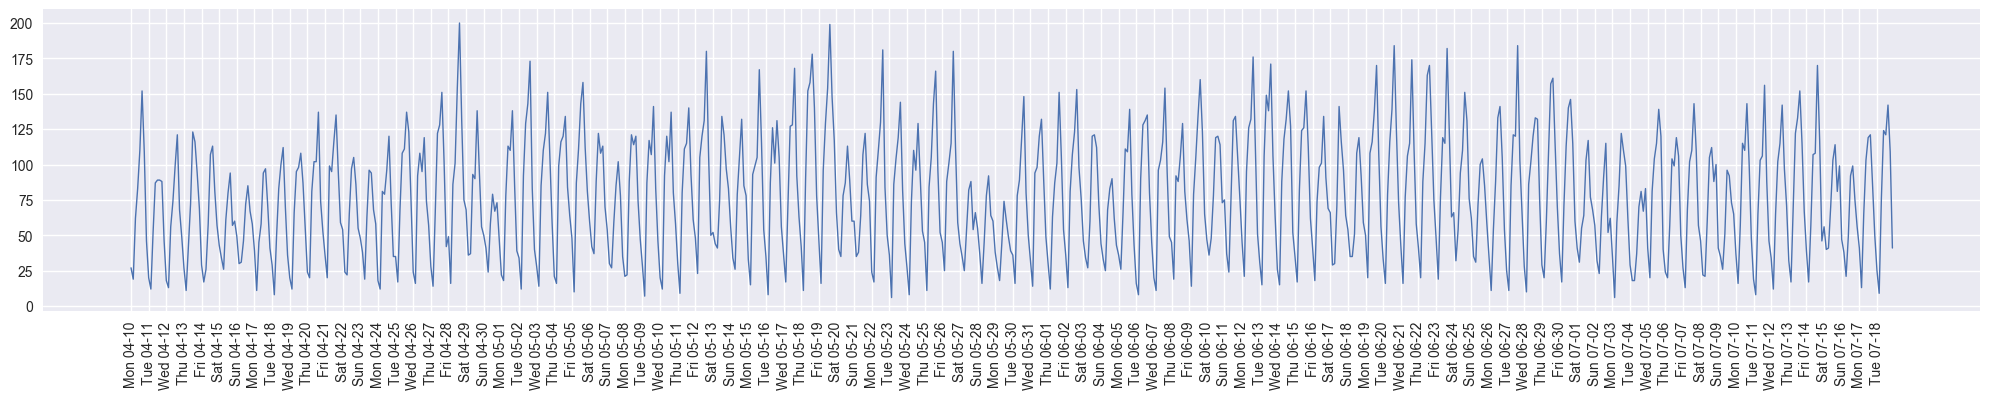

In [183]:
plt.figure(figsize=(25,4), dpi=100)
xticks = pd.date_range(start=df3[:800].index.values.min(), end=df3[:800].index.values.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90)
plt.plot(df3[:800], linewidth=1)


In [184]:
y = df3[:800].values
X = df3[:800].index.values.reshape(-1,1)

In [186]:
X.shape

(800, 1)

In [187]:
y.shape

(800,)

In [181]:
from sklearn.model_selection import train_test_split

In [215]:
train_test_ratio = 0.8
def eval_on_features(feature, target, regressor):
    
    #split into train and test
    xtrain, xtest, ytrain, ytest = train_test_split(feature, target, train_size=train_test_ratio, test_size=1-train_test_ratio, random_state=0)
    
    #fit the data
    regressor.fit(xtrain, ytrain)
    print('In-sampe R^2: {:.2f}'.format(regressor.score(xtrain, ytrain)))
    print('Out-sample R^2: {:.2f}'.format(regressor.score(xtest, ytest)))
    ypred = regressor.predict(xtest)
    ypred_train = regressor.predict(xtrain)
    
    #plotting
    plt.figure(figsize=(25,4), dpi=100)
    plt.xticks(range(0, len(target), 8), xticks.strftime('%a %m-%d'), rotation=90)
    #plot training data
    plt.plot(range(len(ytrain)), ytrain, label='train')
    #plot testing data
    plt.plot(range(len(ytrain), len(ytrain) + len(ytest)), ytest, '-', label='testing')
    #plot in sample prediction
    plt.plot(range(len(ytrain)), ypred_train, '--', label='in-sample prediction')
    #plot out sample prediction
    plt.plot(range(len(ytrain), len(ytrain) + len(ytest)), ypred, '--', label='out-sample prediction')
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Accidents')

In-sampe R^2: 0.93
Out-sample R^2: 0.38


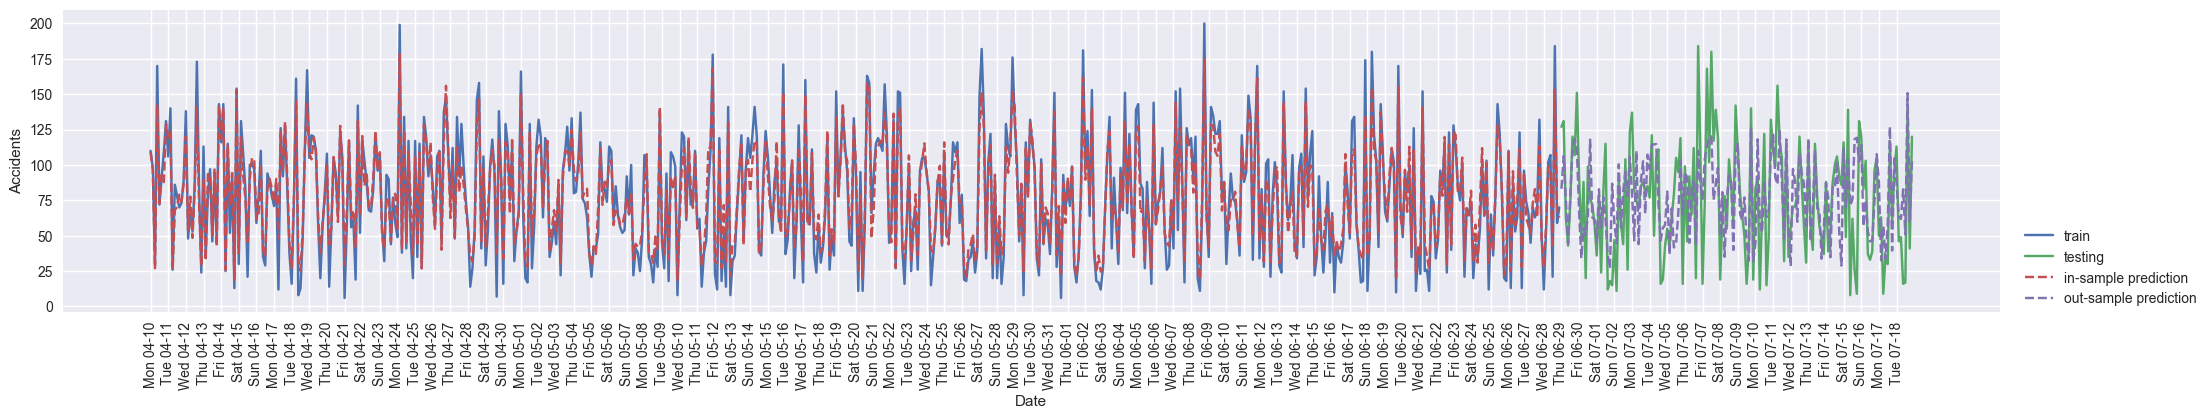

In [216]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

In-sampe R^2: 0.75
Out-sample R^2: 0.78


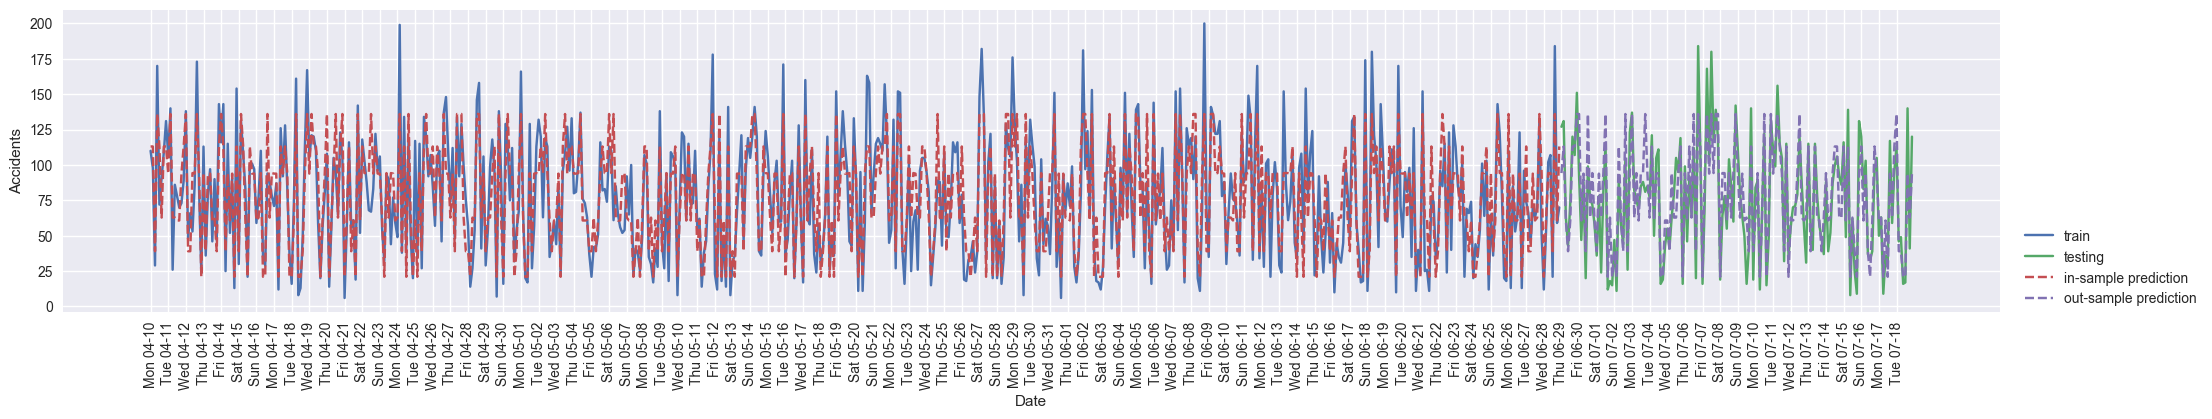

In [217]:
X_hour = df3[:800].index.hour.values.reshape(-1,1)
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X_hour, y, regressor)

In-sampe R^2: 0.86
Out-sample R^2: 0.83


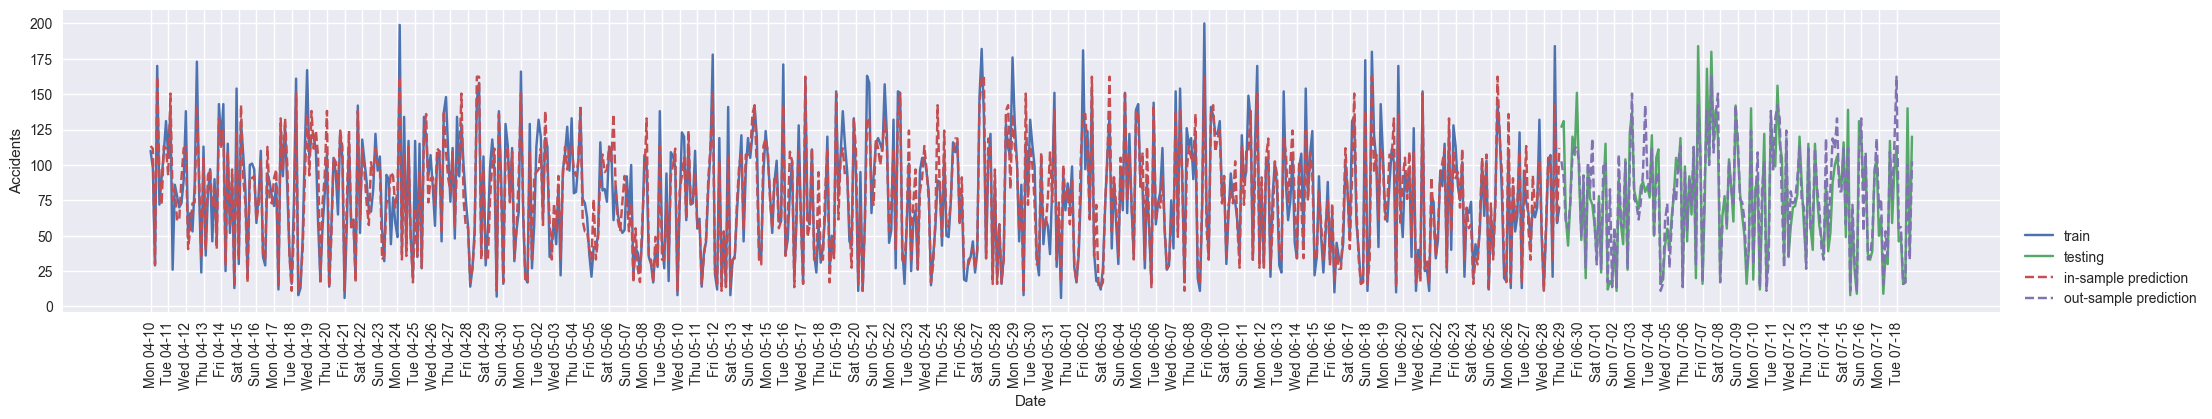

In [218]:
X_hour_week = np.hstack([df3[:800].index.hour.values.reshape(-1,1), df3[:800].index.dayofweek.values.reshape(-1,1)])
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X_hour_week, y, regressor)

In-sampe R^2: 0.26
Out-sample R^2: 0.18


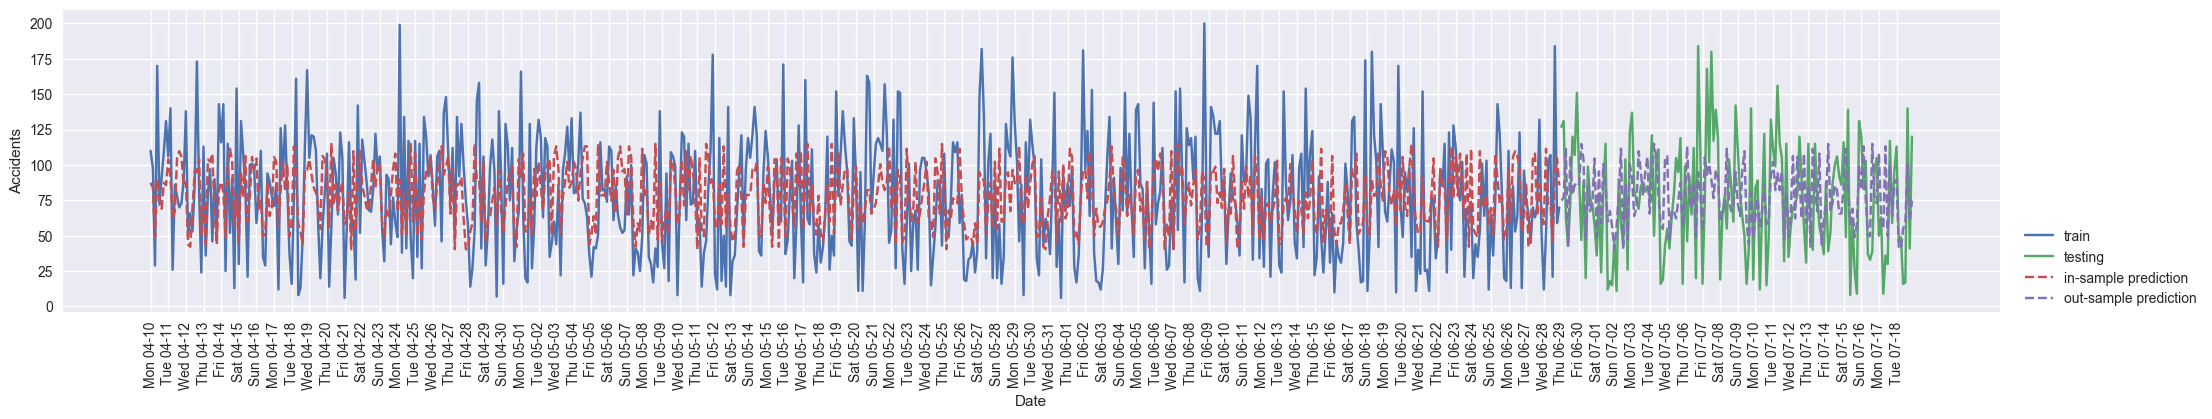

In [219]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [220]:
enc = OneHotEncoder()
X_hour_week_enc = enc.fit_transform(X_hour_week).toarray()

/Users/twwwy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In-sampe R^2: 0.77
Out-sample R^2: 0.81


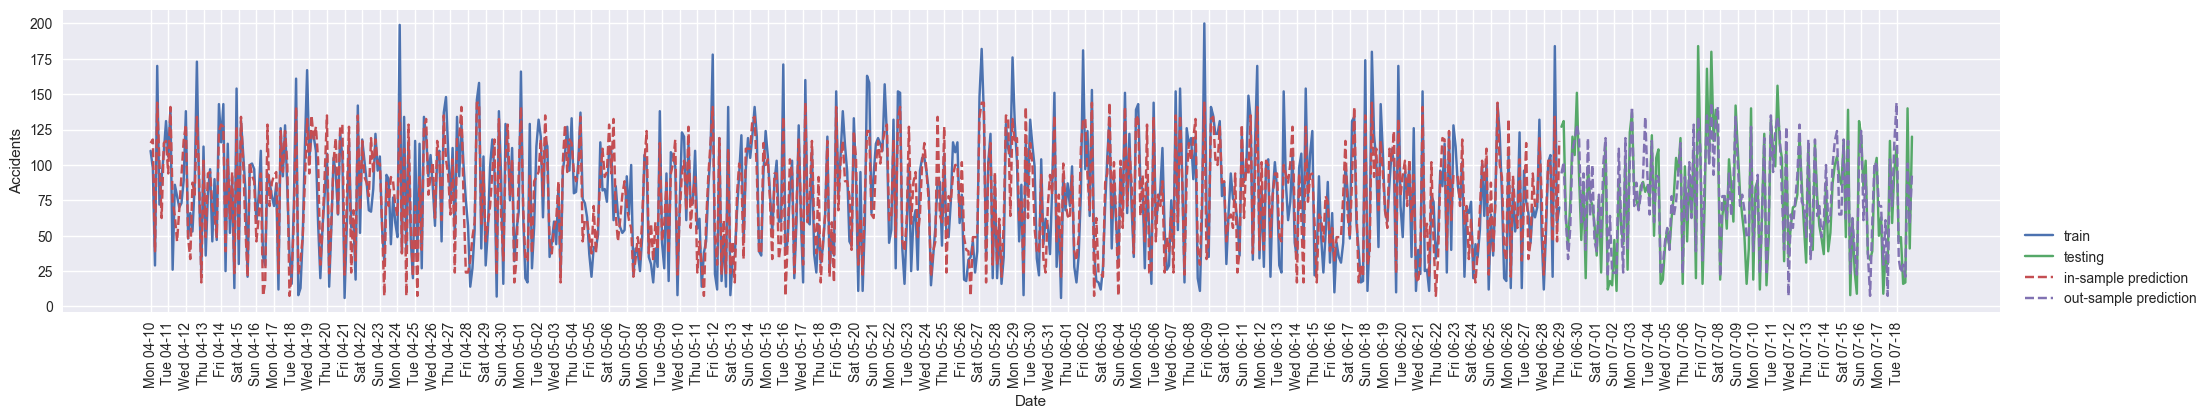

In [221]:
eval_on_features(X_hour_week_enc, y, LinearRegression())

In-sampe R^2: 0.86
Out-sample R^2: 0.83


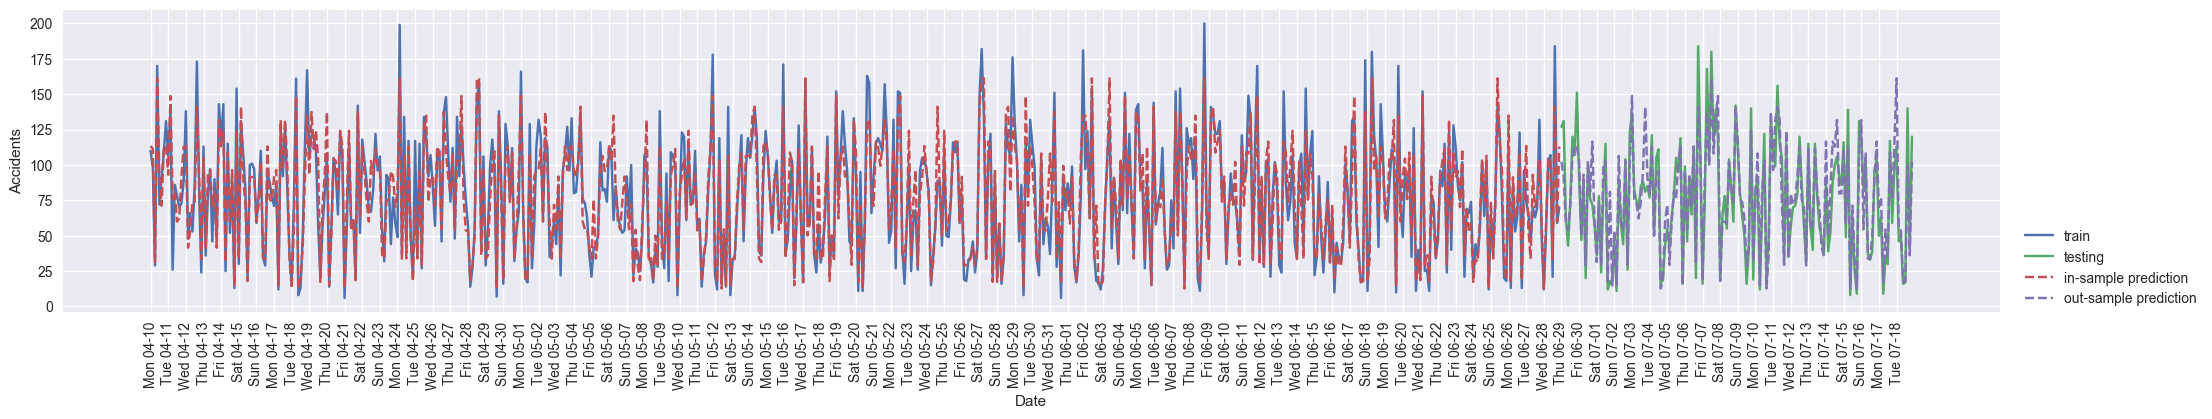

In [224]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_enc_poly = poly_transformer.fit_transform(X_hour_week_enc)
eval_on_features(X_hour_week_enc_poly, y, Ridge())

In [225]:
X_hour_week_enc_poly.shape

(800, 120)